# Pol-Nullstellen-Darstellung

Gegeben ist das LTI-System

$$H(s) = \frac{3 s^2 - 8 s + 7}{s^3 + 4 s^2 + 7 s + 3}$$

Dieses System soll in einen minimalphasigen Anteil $H_{\min}(s)$ und einen Allpass-Anteil $H_{\text{Allpass}}(s)$ mit

$$H(s) = H_{\min}(s) \cdot H_{\text{Allpass}}(s)$$

zerlegt werden. Gehen Sie dazu folgendermaßen vor:

1. Erstellen Sie ein tf-Objekt des Systems und legen Sie dies in der Variable H ab.
2. Plotten Sie das Pol-Nullstellen-Diagramm des Systems.
3. Ermitteln Sie die Pol- und Nullstellen von $H(s)$. Dazu kennt Matlab die Funktion `zpkdata()`. *Hinweis: Die Funktion zpkdata() kennt einen zusätzlichen Parameter 'v'. Dieser vereinfacht die Verwendung der Funktion erheblich. Lesen Sie in der Hilfe nochmal genau nach, wie er zu verwenden ist.*
4. Erstellen Sie Objekte für das minimalphasige System $H_{\min}(s)$ und den Allpass $H_{\text{Allpass}}(s)$ und legen Sie diese in den Variablen H_min bzw. H_all ab. Plotten Sie anschließend die jeweiligen Pol-Nullstellen-Diagramme in unterschiedliche Figures und prüfen Sie das Ergebnis auf Plausibilität. *Hinweis: Sie können die Objekte direkt aus der Pol-Nullstellen-Darstellung erzeugen. Dazu kennt Matlab auch sogenannte zpk-Objekte. Diese lassen sich genauso wie tf-Objekte verwenden.*

Optionale Aufgaben:

1. Vergleichen Sie die Sprungantworten von $H(s)$, $H_{\min}(s)$ und $H_{\text{Allpass}}(s)$ miteinander.
2. Erstellen Sie das Bodediagramm von $H_{\text{Allpass}}(s)$.

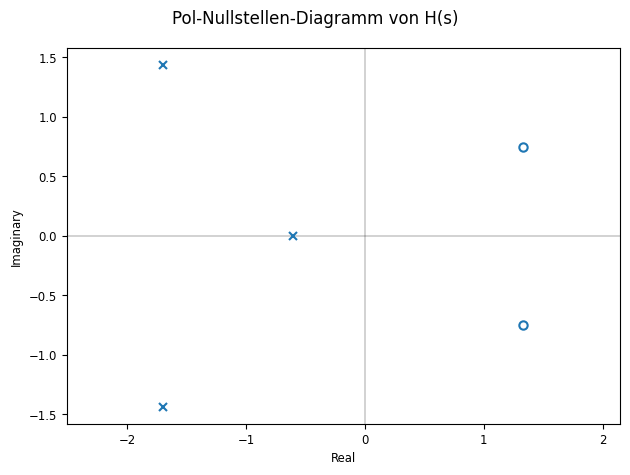

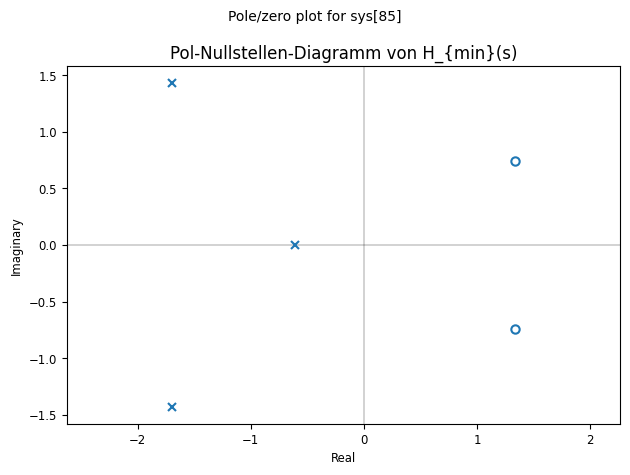

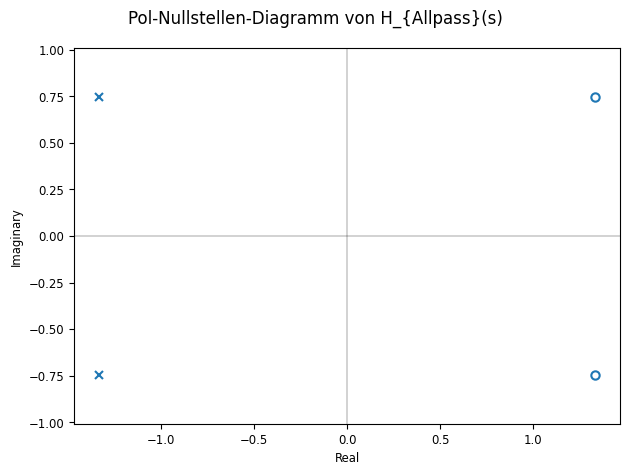

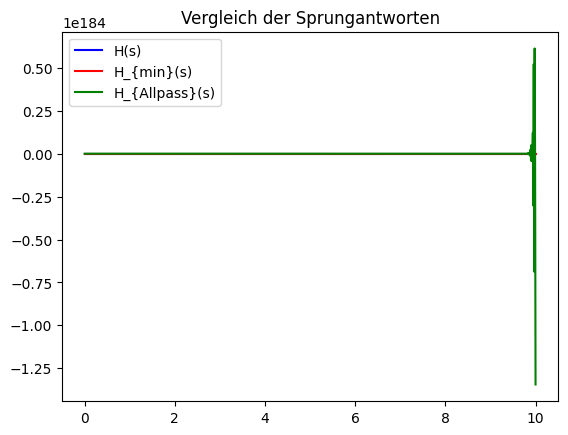

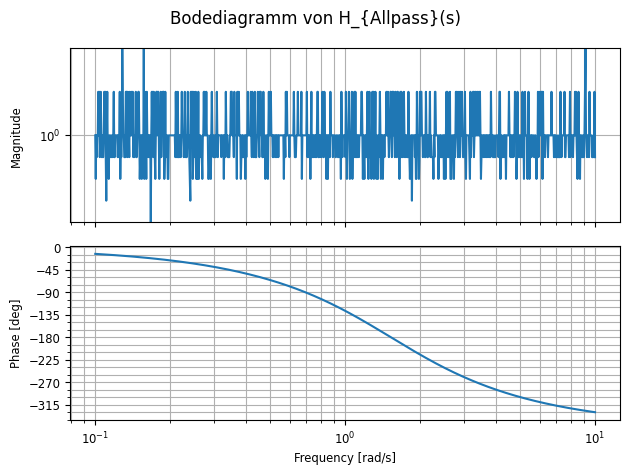

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ctrl

# Erstellen der Übertragungsfunktion H(s)
num = [3, -8, 7]
den = [1, 4, 7, 3]
H = ctrl.TransferFunction(num, den)

# Zeichnen des Pol-Nullstellen-Diagramms von H(s)
plt.figure(1)
# Erst pzmap aufrufen ohne eigenen Titel
poles, zeros = ctrl.pzmap(H, plot=True)
# Dann den vorherigen Titel überschreiben mit plt.suptitle statt plt.title
plt.suptitle('Pol-Nullstellen-Diagramm von H(s)')
plt.tight_layout()

# Extrahieren der Pole und Nullstellen
z = zeros
p = poles
k = num[0] / den[0]  # Verstärkungsfaktor

# Identifizieren von Nullstellen in der rechten und linken Halbebene
rhp_zeros = np.array([zero for zero in z if np.real(zero) > 0])
lhp_zeros = np.array([zero for zero in z if np.real(zero) <= 0])

# Stellen Sie sicher, dass die Arrays nicht leer sind
if len(rhp_zeros) == 0:
    rhp_zeros = np.array([])
if len(lhp_zeros) == 0:
    lhp_zeros = np.array([])

# Spiegelung der Pole für das Allpass-System
mirror_poles = np.array([-np.conjugate(zero) for zero in rhp_zeros])

# Erstellen des minimalphasigen Systems
H_min = ctrl.TransferFunction(num, den)  # Fallback, falls die Zerlegung fehlschlägt
if len(lhp_zeros) > 0:
    H_min = ctrl.zpk(lhp_zeros, p, 1)
    
    # Berechnung der Verstärkung für H_min
    # Vermeidung von Division durch Null
    dc_min = ctrl.dcgain(H_min)
    if abs(dc_min) > 1e-10:  # Kleiner Wert um Division durch Null zu vermeiden
        gain_min = ctrl.dcgain(H) / dc_min
        H_min = gain_min * H_min

# Erstellen des Allpass-Systems
H_all = ctrl.tf([1], [1])  # Einheits-Übertragungsfunktion als Fallback
if len(rhp_zeros) > 0 and len(mirror_poles) > 0:
    H_all = ctrl.zpk(rhp_zeros, mirror_poles, 1)

# Zeichnen des Pol-Nullstellen-Diagramms von H_min(s)
plt.figure(2)
# Erst pzmap aufrufen ohne eigenen Titel
ctrl.pzmap(H_min, plot=True)
# Dann den vorherigen Titel überschreiben
plt.title('Pol-Nullstellen-Diagramm von H_{min}(s)')
plt.tight_layout()

# Zeichnen des Pol-Nullstellen-Diagramms von H_Allpass(s)
plt.figure(3)
# Erst pzmap aufrufen ohne eigenen Titel
ctrl.pzmap(H_all, plot=True)
# Dann den vorherigen Titel überschreiben mit plt.suptitle
plt.suptitle('Pol-Nullstellen-Diagramm von H_{Allpass}(s)')
plt.tight_layout()

# Vergleich der Sprungantworten
plt.figure(4)
t = np.linspace(0, 10, 1000)
_, y1 = ctrl.step_response(H, T=t)
_, y2 = ctrl.step_response(H_min, T=t)
_, y3 = ctrl.step_response(H_all, T=t)

plt.plot(t, y1, 'b', label='H(s)')
plt.plot(t, y2, 'r', label='H_{min}(s)')
plt.plot(t, y3, 'g', label='H_{Allpass}(s)')
plt.title('Vergleich der Sprungantworten')
plt.legend()

# Zeichnen des Bode-Diagramms von H_Allpass(s)
plt.figure(5)
# Erst bode aufrufen ohne eigenen Titel
mag, phase, omega = ctrl.bode(H_all, plot=True)
# Dann den vorherigen Titel überschreiben mit plt.suptitle
plt.suptitle('Bodediagramm von H_{Allpass}(s)')
plt.tight_layout()

plt.tight_layout()
plt.show()